In [8]:
N = (5 + 4) % 5 + 1

print(N)

5


In [23]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'NationalNames.csv'
data = pd.read_csv(file)

In [32]:
data.tail(8) # 2

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [40]:
data.describe() # 4

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [41]:
# Групування за статтю та підрахунок унікальних імен
gender_counts = data.groupby('Gender')['Name'].nunique().reset_index()

# Перейменування стовпців
gender_counts.columns = ['Gender', 'Count']

gender_counts.tail(2) # 6

,Gender,Count
0,F,64911
1,M,39199


In [46]:
# Відфільтрувати дані за 2010 рік
data_2010 = data[data['Year'] == 2010]

# Відфільтрувати чоловічі імена
male_names_2010 = data_2010[data_2010['Gender'] == 'M']

male_names_2010.head(5) # 7

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [61]:
min_count = data['Count'].min()
min_count_records = (data['Count'] == min_count).sum()

min_count_records # 9

254615

In [62]:
data.groupby('Year')['Name'].nunique().reset_index(name='Unique Names') # 10

,Year,Unique Names
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [63]:
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index(name='Total Births')
total_births_per_year.head() # 15

,Year,Total Births
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


In [64]:
total_children_per_year = data.groupby('Year')['Count'].sum() # 16
total_children_per_year.idxmax()

1957

In [65]:
data.groupby(['Year', 'Gender'])['Count'].sum().unstack() # 17

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [66]:
years_more_girls = (children_per_year_gender['F'] > children_per_year_gender['M']).sum() # 18
years_more_girls

54

In [67]:
data_m = data[data['Gender'] == 'M'] # 20
data_f = data[data['Gender'] == 'F']
unique_names_m = set(data_m['Name'].unique())
unique_names_f = set(data_f['Name'].unique())
neutral_names_for_20 = unique_names_m.intersection(unique_names_f)
len(neutral_names_for_20)

10221

In [68]:
barbara_male_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum() # 21
barbara_male_count

4139

In [69]:
data['Year'].nunique() # 22

135

In [71]:
name_year_counts = neutral_names.groupby('Name')['Year'].nunique().reset_index() # 23
all_years = data['Year'].nunique()
filtered_names = name_year_counts[name_year_counts['Year'] == all_years]
filtered_names_result = data[data['Name'].isin(filtered_names['Name'])]
neutral_name_counts = filtered_names_result.groupby('Name')['Count'].sum().reset_index()
sorted__neutral_names = neutral_name_counts.sort_values(by='Count', ascending=False)
sorted__neutral_names = sorted__neutral_names.head(16)

for i, name in enumerate(top_neutral_names['Name']): # 23
    print(f"{i} {name}")

0 James
1 John
2 Robert
3 William
4 Joseph
5 Jean
6 Jesse
7 Leslie
8 Francis
9 Lee
10 Jessie
11 Marion
12 Johnnie
13 Sidney
14 Ollie
15 Tommie


In [96]:
# Відфільтруємо дані за критерієм "непопулярність" # 24
unpopular_names = data[data['Count'] < 100]

# Знайдемо найбільш популярне серед цих "непопулярних" імен
most_popular_unpopular_name = unpopular_names.sort_values(by='Count', ascending=False).head(1)
print(f"Найпопулярніше серед непопулярних імен: {most_popular_unpopular_name['Name'].values[0]}. {most_popular_unpopular_name['Count'].values[0]}")

Найпопулярніше серед непопулярних імен: Johnson. 99


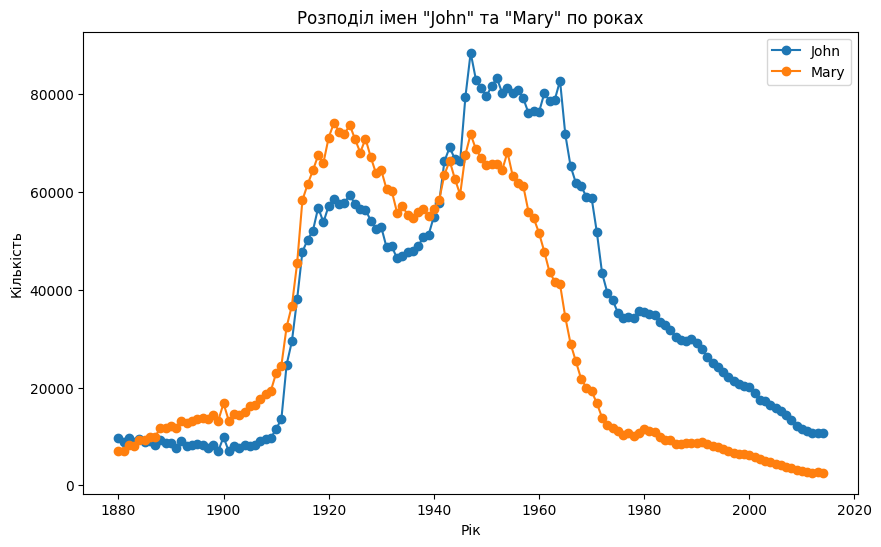

In [81]:
# Відфільтрувати дані для імен John та Mary
john_data = data[(data['Name'] == 'John')]
mary_data = data[(data['Name'] == 'Mary')]

# Згрупувати за роками
john_grouped = john_data.groupby('Year')['Count'].sum()
mary_grouped = mary_data.groupby('Year')['Count'].sum()

# Побудувати графік розподілу для імен John та Mary по роках
plt.figure(figsize=(10, 6))

plt.plot(john_grouped.index, john_grouped.values, marker='o', linestyle='-', label='John')
plt.plot(mary_grouped.index, mary_grouped.values, marker='o', linestyle='-', label='Mary')

plt.title('Розподіл імен "John" та "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()

plt.show() # 25

In [79]:
popular_names_by_year = data.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()]) # 27
popular_names_by_year[["Name", "Count"]]

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
